In [1]:
#import libraries
import pandas as pd
import numpy as np
import random as rd
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('Loan.csv')
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


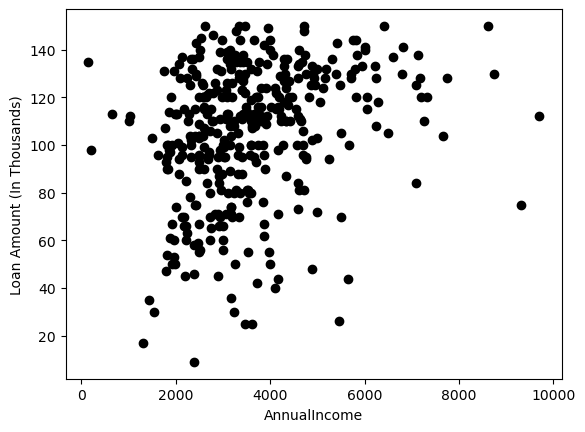

In [4]:
X = data[["LoanAmount","ApplicantIncome"]]
#Visualise data points
plt.scatter(X["ApplicantIncome"],X["LoanAmount"],c='black')
plt.xlabel('AnnualIncome')
plt.ylabel('Loan Amount (In Thousands)')
plt.show()

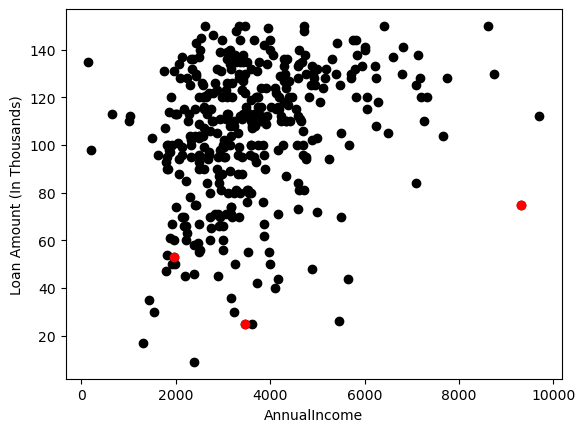

In [5]:
# Step 1 and 2 - Choose the number of clusters (k) and select random centroid for each cluster

#number of clusters
K=3

# Select random observation as centroids
Centroids = (X.sample(n=K))
plt.scatter(X["ApplicantIncome"],X["LoanAmount"],c='black')
plt.scatter(Centroids["ApplicantIncome"],Centroids["LoanAmount"],c='red')
plt.xlabel('AnnualIncome')
plt.ylabel('Loan Amount (In Thousands)')
plt.show()

In [10]:
diff = 1
iteration = 0

# While loop to repeat the steps until convergence
while diff != 0:
    # Make a copy of the original data to avoid modifying it directly
    XD = X.copy()
    
    # Step 3 - Assign each point to the closest centroid
    # Calculate the distance from each point to each centroid
    for index1, centroid in Centroids.iterrows():
        distances = []
        for index2, row in XD.iterrows():
            distance = np.sqrt((centroid["ApplicantIncome"] - row["ApplicantIncome"]) ** 2 + 
                               (centroid["LoanAmount"] - row["LoanAmount"]) ** 2)
            distances.append(distance)
        
        # Store the distances in a new column for each centroid, making sure the column name is unique
        XD[f"Distance_to_Centroid_{index1}"] = distances

    # Step 4 - Assign each data point to the closest centroid
    cluster_assignments = []
    for _, row in XD.iterrows():
        # Find the centroid with the minimum distance
        min_dist = float('inf')  # Start with a very large number
        cluster_idx = -1  # Initialize with an invalid cluster index
        
        # Loop through all centroid distance columns dynamically
        for i in range(K):
            centroid_column = f"Distance_to_Centroid_{i}"
            if centroid_column in row and row[centroid_column] < min_dist:
                min_dist = row[centroid_column]
                cluster_idx = i
        
        # Assign the closest cluster
        cluster_assignments.append(cluster_idx)

    # Update the DataFrame with the new cluster assignments
    XD["Cluster"] = cluster_assignments

    # Step 5 - Recompute the centroids of the newly formed clusters
    new_centroids = XD.groupby("Cluster")[["LoanAmount", "ApplicantIncome"]].mean()

    # Check for convergence (difference between old and new centroids)
    if iteration == 0:
        diff = 1  # Force the loop to run at least once
        iteration += 1
    else:
        # Calculate the change in centroids
        diff = (new_centroids['LoanAmount'] - Centroids['LoanAmount']).sum() + \
               (new_centroids['ApplicantIncome'] - Centroids['ApplicantIncome']).sum()

        print(f"Iteration {iteration}: Centroid difference = {diff}")
    
    # Update centroids for the next iteration
    Centroids = new_centroids.copy()


Iteration 1: Centroid difference = -475.1626892799994
Iteration 1: Centroid difference = -347.49950572708826
Iteration 1: Centroid difference = -226.10513484837873
Iteration 1: Centroid difference = -134.85342035130077
Iteration 1: Centroid difference = -142.26643860414725
Iteration 1: Centroid difference = -51.357601189375444
Iteration 1: Centroid difference = -33.5498262542651
Iteration 1: Centroid difference = -66.1644508652937
Iteration 1: Centroid difference = -16.02288252131322
Iteration 1: Centroid difference = -15.936609357143979
Iteration 1: Centroid difference = 0.0


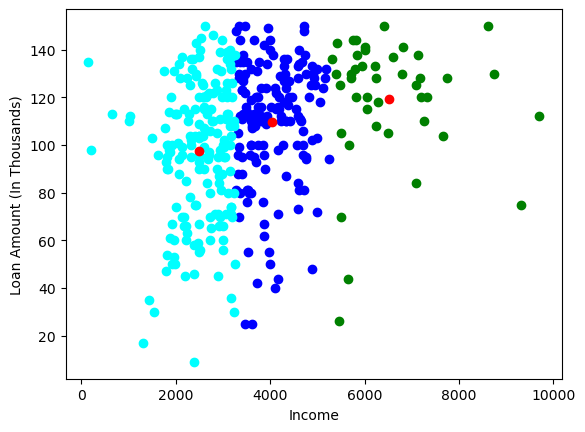

In [7]:
color=['blue','green','cyan']
for k in range(K):
    data=X[X["Cluster"]==k+1]
    plt.scatter(data["ApplicantIncome"],data["LoanAmount"],c=color[k])
plt.scatter(Centroids["ApplicantIncome"],Centroids["LoanAmount"],c='red')
plt.xlabel('Income')
plt.ylabel('Loan Amount (In Thousands)')
plt.show()